In [1]:
import ants
# img = ants.image_read('MNI152_T1_1.25mm_brain.nii.gz')
# img = ants.image_read('MNI152_T1_1mm_Brain.nii.gz')
# image_n3 = ants.n3_bias_field_correction(img) #bias field correction
# ants.plot(img)#, overlay = img > img.mean())
# ants.plot(img)#, overlay = img > img.mean())

In [2]:
fi = ants.image_read('MNI152_T1_1mm_Brain.nii.gz')
mi = ants.image_read('/home/stefano/projects/augmentation/OASIS_BRAIN_1/traghetto/data/sub-OAS30010/ses-d0068/anat/sub-OAS30010_ses-d0068_T1w.nii.gz')
# fi = ants.resample_image(fi, (60,60), 1, 0)
# mi = ants.resample_image(mi, (60,60), 1, 0)
mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = 'SyN' ) #registrazione
# mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = 'antsRegistrationSyN[t]' )
# mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = 'antsRegistrationSyN[b]' )
# mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = 'antsRegistrationSyN[s]' )

In [3]:
print(mytx)

{'warpedmovout': ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-90.0, 126.0, -72.0)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]
, 'warpedfixout': ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (176, 240, 256)
	 Spacing    : (1.2, 1.0547, 1.0547)
	 Origin     : (105.0008, 100.5078, -133.9453)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]
, 'fwdtransforms': ['/tmp/tmptdqhkea11Warp.nii.gz', '/tmp/tmptdqhkea10GenericAffine.mat'], 'invtransforms': ['/tmp/tmptdqhkea10GenericAffine.mat', '/tmp/tmptdqhkea11InverseWarp.nii.gz']}


In [4]:
mywarpedimage = ants.apply_transforms( fixed=fi, moving=mi,
                                           transformlist=mytx['fwdtransforms'] ) #applico registrazione

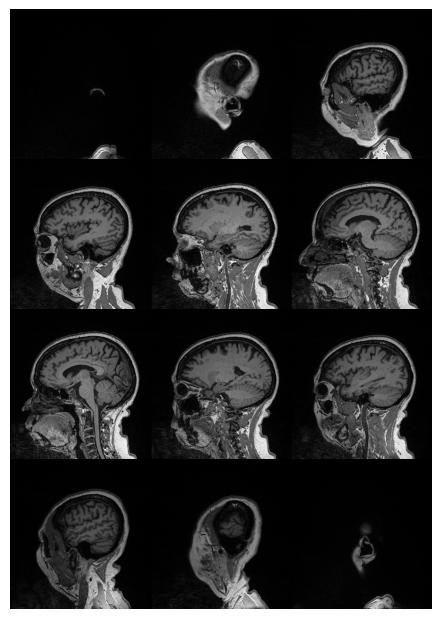

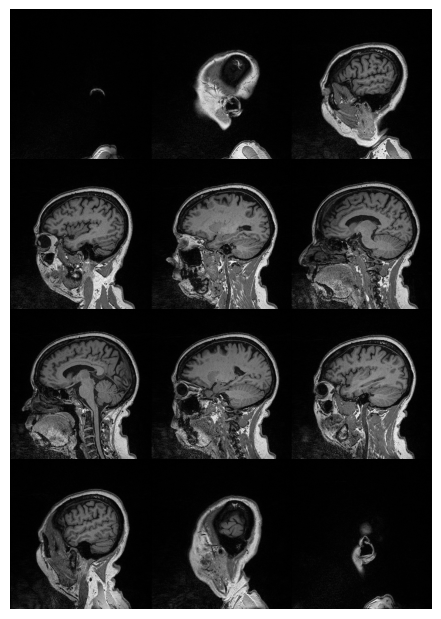

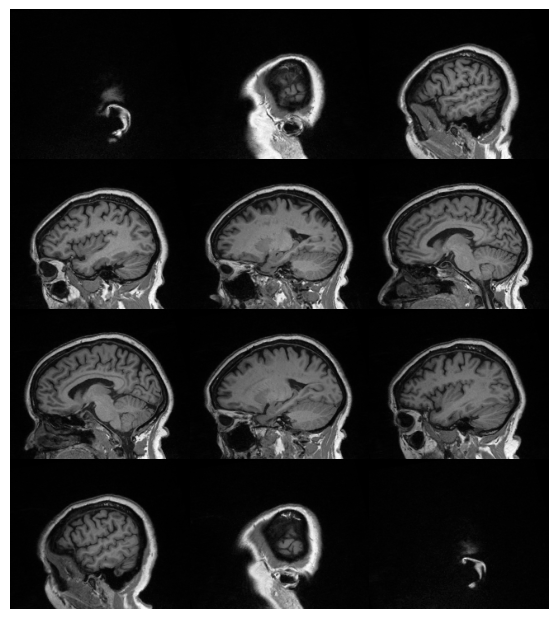

In [5]:
ants.plot(mi)#, overlants.plot(mywarpedimage)#, overlay = img > img.mean())
mi_bias = ants.n3_bias_field_correction(mi)
ants.plot(mi_bias)#, overlants.plot(mywarpedimage)#, overlay = img > img.mean())

ants.plot(mywarpedimage)#, overlants.plot(mywarpedimage)#, overlay = img > img.mean())


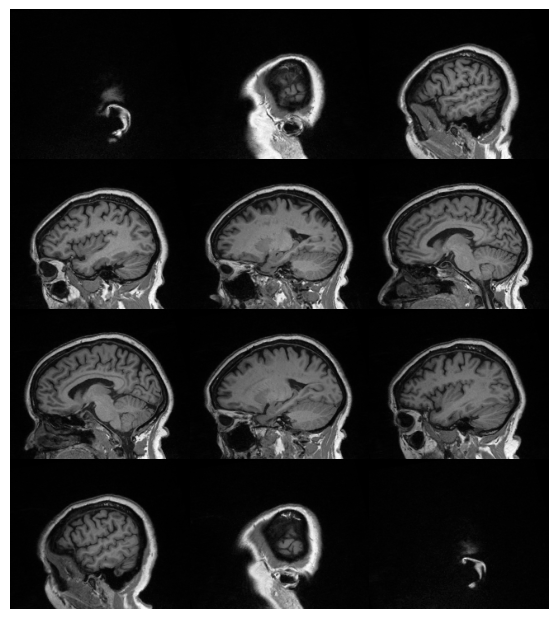

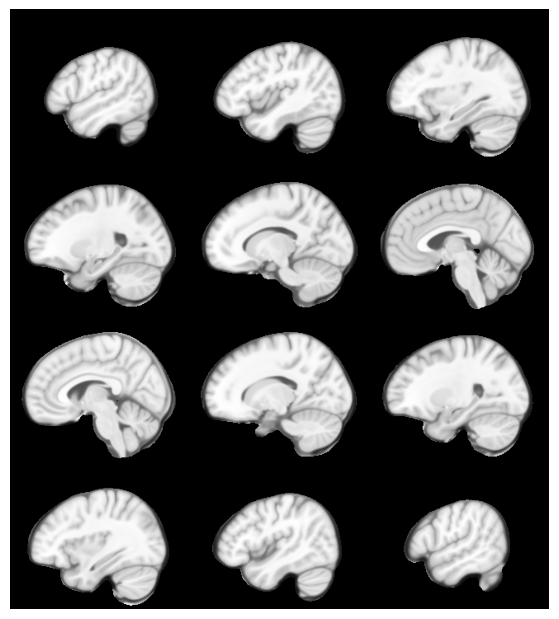

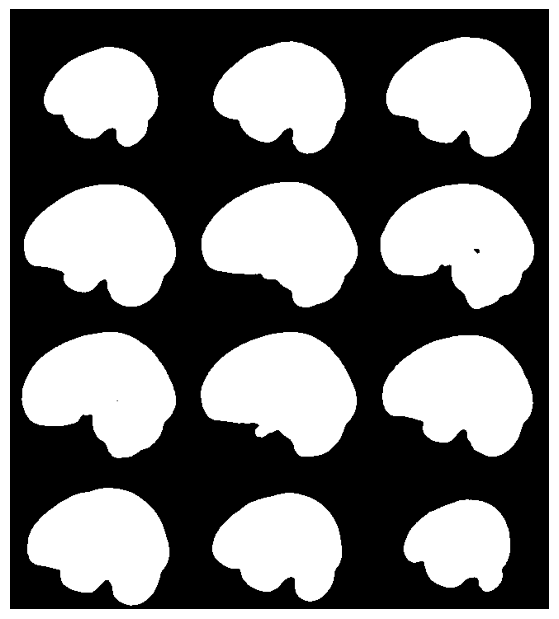

In [7]:
mask = ants.image_read('MNI152_T1_1mm_Brain_Mask.nii.gz')
ants.plot(mywarpedimage)
ants.plot(fi)
ants.plot(mask)

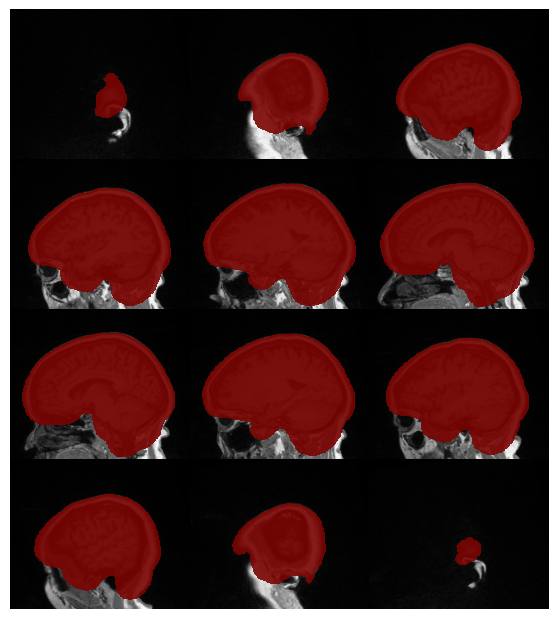

In [17]:
# stripped = mywarpedimage - mask
# stripped[:20,:20,:20]
ants.plot(mywarpedimage , mask)

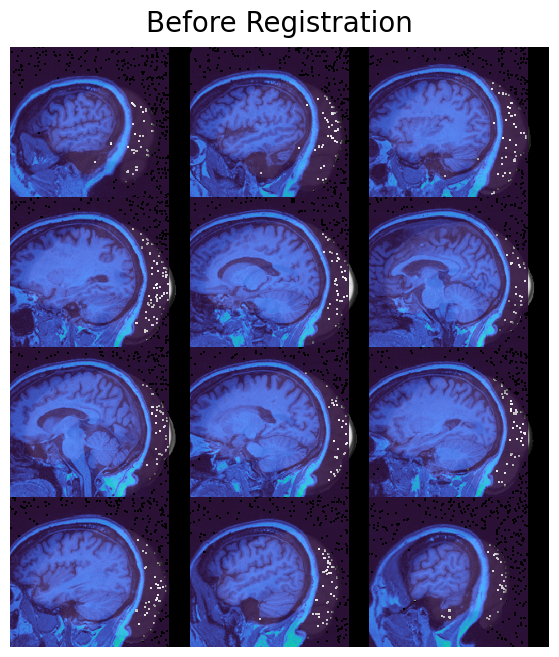

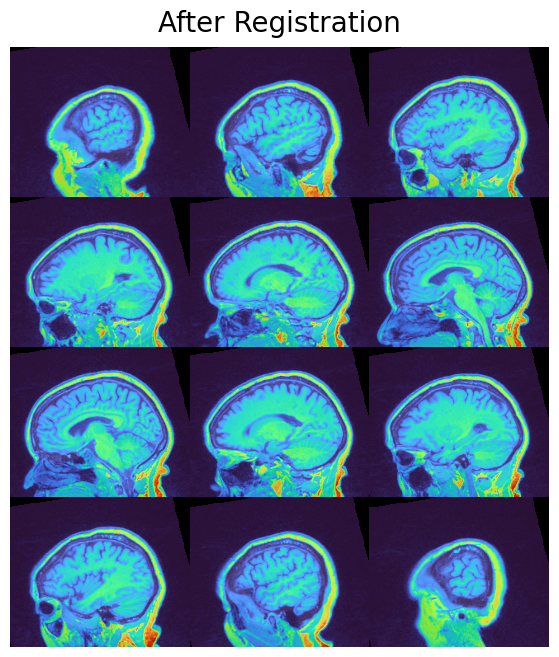

In [19]:
fi.plot(overlay=mi, title='Before Registration')


fi.plot(overlay=mywarpedimage,
           title='After Registration')

In [ ]:
# # import the BrainExtractor class
# from brainextractor import BrainExtractor
# import nibabel as nib
# # read in the image file first
# input_img = nib.load('/home/stefano/projects/augmentation/OASIS_BRAIN_1/traghetto/data/sub-OAS30010/ses-d0068/anat/sub-OAS30010_ses-d0068_T1w.nii.gz')

# # create a BrainExtractor object using the input_img as input
# # we just use the default arguments here, but look at the
# # BrainExtractor class in the code for the full argument list
# bet = BrainExtractor(img=input_img)

# # run the brain extraction
# # this will by default run for 1000 iterations
# # I recommend looking at the run method to see how it works
# bet.run()

# # save the computed mask out to file
# bet.save_mask("./outfolder/output_MNI_mask.nii.gz")

In [ ]:
# stripped = ants.image_read("./outfolder/output_MNI_mask.nii.gz")

# ants.plot(stripped)#, overlants.plot(mywarpedimage)#, overlay = img > img.mean())
